In [1]:
import pickle
import random

import pygsti
from pygsti.circuits import Circuit
import numpy as np
from numpy import pi, sin, cos, tan, arcsin, arccos, arctan2, sqrt, exp
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import cm, colors

from mpl_toolkits.mplot3d import Axes3D

from reset import QuantumSim, prep_projector_matrices_pp
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from math_objects import *

In [2]:
def asSpherical(xyz):
    #takes list xyz (single coord)
    x       = xyz[0]
    y       = xyz[1]
    z       = xyz[2]
    r       =  sqrt(x*x + y*y + z*z)
    theta   =  arccos(z/r)
    phi     =  arctan2(y,x)
    return [r,theta,phi]

def asCartesian(rthetaphi):
    #takes list rthetaphi (single coord)
    r       = rthetaphi[0]
    theta   = rthetaphi[1]
    phi     = rthetaphi[2]
    x = r * sin( theta ) * cos( phi )
    y = r * sin( theta ) * sin( phi )
    z = r * cos( theta )
    return [x,y,z]

def distance_on_sphere(coord_a, coord_b):
    #coordinates must have norm = 1
    #coord_a /= norm(coord_a)
    #coord_b /= norm(coord_b)
    return arccos(np.dot(coord_a, coord_b))
    
def total_distance(xyz, coordiantes):
    #xyz /= norm(xyz)
    distance = 0
    for coordinate in coordiantes:
        distance += distance_on_sphere(xyz, coordinate)
    
    return distance

def con(xyz):
    return xyz[0]**2 + xyz[1]**2 + xyz[2]**2 - 1

Find all possible rotation axis

In [4]:
test = QuantumSim(labels=[0,1,2,3,5,8])
#test = QuantumSim(labels=[11,12,13,14])
#pauli_basis_exepected_values = test.Xtalk_vaccine_tomography(attack_origins=[(8,11), (11,8)], vaccine_qubits=[2,3,5,8], 
#                                                             cnot_count1=2, cnot_count2=3, sample_size=5000, separate=False)
pauli_basis_exepected_values = test.Xtalk_vaccine_tomography_fast(attack_origins=[(0,1), (1,0)], vaccine_qubits=[2,3,5,8], 
                                                                  cnot_count1=2, cnot_count2=3)
print('bloch vectors obtained')
vaccine_parameters = QuantumSim.Xtalk_vaccine_parameters(pauli_basis_exepected_values, cnot_count1=2, cnot_count2=3)
print('done')

C:\Users\k0426\Documents\python_packages_common\pyGSTi\pygsti\modelmembers\operations\lindbladerrorgen.py:1691: UserWarning: Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'
  _warnings.warn("Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'")


bloch vectors obtained
done


In [5]:
vaccine_parameters

{(0,
  1): {2: [array([-0.97178681, -0.19243937,  0.13637257]),
   0.9103318669990333], 3: [array([-0.95829076,  0.00305277,  0.28577877]),
   0.7771946105012808], 5: [array([-0.91911784, -0.30041365, -0.25490004]),
   0.747581412273584], 8: [array([-0.96227619, -0.26842334,  0.04442347]),
   0.8180144086516387]},
 (1,
  0): {2: [array([-0.96705888, -0.2035547 ,  0.15284829]),
   0.8679843927195362], 3: [array([-0.97489736, -0.11006819,  0.1935462 ]),
   0.6836661481644971], 5: [array([-0.96042912, -0.16846717, -0.22179883]),
   0.7027883425569869], 8: [array([-0.93505776, -0.35146362,  0.04626342]),
   0.7787161548570211]}}

In [3]:
test = QuantumSim(labels=[2,3,4,5,7,8])
#test = QuantumSim(labels=[11,12,13,14])
#pauli_basis_exepected_values = test.Xtalk_vaccine_tomography(attack_origins=[(8,11), (11,8)], vaccine_qubits=[2,3,5,8], 
#                                                             cnot_count1=2, cnot_count2=3, sample_size=5000, separate=False)
pauli_basis_exepected_values = test.Xtalk_vaccine_tomography_fast(attack_origins=[(4,7), (7,4)], vaccine_qubits=[2,3,5,8], 
                                                                  cnot_count1=2, cnot_count2=3)
print('bloch vectors obtained')
vaccine_parameters = QuantumSim.Xtalk_vaccine_parameters(pauli_basis_exepected_values, cnot_count1=2, cnot_count2=3)
print('done')

C:\Users\k0426\Documents\python_packages_common\pyGSTi\pygsti\modelmembers\operations\lindbladerrorgen.py:1691: UserWarning: Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'
  _warnings.warn("Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'")


bloch vectors obtained
done


In [3]:
test = QuantumSim(labels=[0,1,2,3,5,8,9,11,14,16])
#test = QuantumSim(labels=[11,12,13,14])
#pauli_basis_exepected_values = test.Xtalk_vaccine_tomography(attack_origins=[(8,11), (11,8)], vaccine_qubits=[2,3,5,8], 
#                                                             cnot_count1=2, cnot_count2=3, sample_size=5000, separate=False)
pauli_basis_exepected_values = test.Xtalk_vaccine_extended(attack_origins=[(0,1), (1,0)], vaccine_qubits=[2,3,5,8,9,11,14,16], 
                                                                  cnot_count1=2, cnot_count2=3)
print('bloch vectors obtained')
vaccine_parameters = QuantumSim.Xtalk_vaccine_parameters(pauli_basis_exepected_values, cnot_count1=2, cnot_count2=3)
print('done')

C:\Users\k0426\Documents\python_packages_common\pyGSTi\pygsti\modelmembers\operations\lindbladerrorgen.py:1691: UserWarning: Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'
  _warnings.warn("Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'")
c:\Users\k0426\Documents\PhD_Project\SQ_reproduce\reset.py:279: UserWarning: number of qubits exceeded maximum matrix dimension, pp_id attribute not established
  warnings.warn('number of qubits exceeded maximum matrix dimension, pp_id attribute not established')
c:\Users\k0426\Documents\PhD_Project\SQ_reproduce\reset.py:287: UserWarning: number of qubits exceeded maximum precomputed matrices, measurement_matrices attribute not established.
  warnings.warn('number of qubits exceeded maximum precomputed matrices, measurement_matrices attribute not established.')


bloch vectors obtained
done


Single-H paramters amplified, used for detection rate plot (deprecated)

In [4]:
# x3.075 on single-H parameters, unchanged on other paramters (1 SQ)
vaccine_parameters = {(0,
  1): {9: [array([-0.56580393,  0.56989563,  0.59589   ]),
   0.7254985235325759]},
 (1,
  0): {9: [array([-0.45908783,  0.59138248,  0.66295183]),
   0.8003999805867609]}}

{(0,
  1): {9: [array([-0.56580393,  0.56989563,  0.59589   ]),
   0.7254985235325759]},
 (1,
  0): {9: [array([-0.45908783,  0.59138248,  0.66295183]),
   0.8003999805867609]}}

In [7]:
# x3.4 on single-H parameters, unchanged on other paramters (2 SQs)
vaccine_parameters = {(0,
  1): {11: [array([-0.92955709, -0.3675926 ,  0.02827189]),
   0.723774286430562], 14: [array([-0.92690533, -0.37280989,  0.04311951]),
   0.8159476672523208]},
 (1,
  0): {11: [array([-0.92250898, -0.12226397,  0.36609932]),
   0.7556919809314264], 14: [array([-0.88468638, -0.46603277, -0.01197803]),
   0.807379392664172]}}

In [3]:
# x2.5 on single-H parameters, unchanged on other paramters (4 SQs)
vaccine_parameters = {(0,
  1): {2: [np.array([-0.97183673, -0.20302644,  0.11963962]),
   0.9030029140761119], 3: [np.array([-0.94944847,  0.03666535,  0.31177436]),
   0.7755743692182168], 5: [np.array([-0.89469782, -0.33979387, -0.28992402]),
   0.7659309237614007], 8: [np.array([-0.96539822, -0.25289256,  0.06365239]),
   0.8231178016310272]},
 (1,
  0): {2: [np.array([-0.96708839, -0.19478705,  0.16370109]),
   0.8898033771982167], 3: [np.array([-0.97629739, -0.07204291,  0.20409122]),
   0.6958581917544505], 5: [np.array([-0.93225965, -0.23696821, -0.27338254]),
   0.7151653058531527], 8: [np.array([-0.94416136, -0.32311772,  0.06445356]),
   0.7716107050489113]}}

All paramters amplified, used for detection rate plot

In [4]:
# x3.075 on on all paramters (1 SQ)
vaccine_parameters = {(0,
  1): {9: [array([-0.53540512,  0.57546859,  0.61820487]),
   0.7294943819234954]},
 (1,
  0): {9: [array([-0.46431491,  0.58794033,  0.66237287]),
   0.8413352060533333]}}

In [3]:
# x3.4 on all paramters (2 SQs)
vaccine_parameters = {(0,
  1): {11: [array([-0.9479469 , -0.3053318 ,  0.09038342]),
   0.7326439681227499], 14: [array([-0.91357492, -0.4063742 , -0.01551997]),
   0.9146804412612425]},
 (1,
  0): {11: [array([-0.92847441, -0.14893063,  0.34022778]),
   0.7875373195881327], 14: [array([-0.88652258, -0.45928746, -0.05597086]),
   0.8725718868160207]}}

In [2]:
# x2.368 on all paramters (4 SQs)
vaccine_parameters = {(0,
  1): {2: [array([-0.9708527 , -0.21843395,  0.09864913]),
   0.8881908848560646], 3: [array([-0.94756276, -0.06947795,  0.31192568]),
   0.7930240327453743], 5: [array([-0.89044408, -0.33883714, -0.30380705]),
   0.7770930053211335], 8: [array([-0.95586306, -0.27398739,  0.10609774]),
   0.8172057957108506]},
 (1,
  0): {2: [array([-0.94914426, -0.28894353,  0.12504723]),
   0.8718602854199161], 3: [array([-0.95042548, -0.18566072,  0.24944239]),
   0.6675185452800191], 5: [array([-0.91799707, -0.25354737, -0.30495099]),
   0.7302459377669894], 8: [array([-0.92972906, -0.35922524,  0.08100061]),
   0.7365559555346705]}}

All parameters amplified, used for detection rate plot (all qubits 0,1,2,3,5,8 are included as latency)

In [3]:
# x2.173 on all paramters (1 SQ)
vaccine_parameters = {(0,
  1): {2: [array([-0.95753627, -0.27766508,  0.07762981]),
   0.7996992395915266]},
 (1,
  0): {2: [array([-0.94620064, -0.3086632 ,  0.09711529]),
   0.7716263108189261]}}

In [3]:
# x2.345 on all paramters (2 SQs)
vaccine_parameters = {(0,
  1): {2: [array([-0.96259838, -0.2563491 ,  0.08768977]),
   0.8771531905715443], 3: [array([-0.94743613, -0.06718624,  0.3128111 ]),
   0.7528526639067321]},
 (1,
  0): {2: [array([-0.95274121, -0.28258815,  0.11148149]),
   0.8459685128830943], 3: [array([-0.94451465, -0.23024209,  0.23426622]),
   0.666247954225257]}}

In [3]:
# x2.368 on all paramters (4 SQs)
vaccine_parameters = {(0,
  1): {2: [array([-0.9708527 , -0.21843395,  0.09864913]),
   0.8881908848560646], 3: [array([-0.94756276, -0.06947795,  0.31192568]),
   0.7930240327453743], 5: [array([-0.89044408, -0.33883714, -0.30380705]),
   0.7770930053211335], 8: [array([-0.95586306, -0.27398739,  0.10609774]),
   0.8172057957108506]},
 (1,
  0): {2: [array([-0.94914426, -0.28894353,  0.12504723]),
   0.8718602854199161], 3: [array([-0.95042548, -0.18566072,  0.24944239]),
   0.6675185452800191], 5: [array([-0.91799707, -0.25354737, -0.30495099]),
   0.7302459377669894], 8: [array([-0.92972906, -0.35922524,  0.08100061]),
   0.7365559555346705]}}

single-H amplified, used for detection rate plot (all qubits 0,1,2,3,5,8 are included as latency)

In [3]:
# x2.22 (1 SQ)
vaccine_parameters = {(0,
  1): {2: [array([-0.96899949, -0.21312439,  0.12497191]),
   0.8037521330889881]},
 (1,
  0): {2: [array([-0.96372538, -0.22725268,  0.1399629 ]), 0.766720947123936]}}

In [3]:
#x2.412 (2 SQs)
vaccine_parameters = {(0,
  1): {2: [array([-0.97108699, -0.19780361,  0.13365547]),
   0.8831152020576112], 3: [array([-0.95903228, -0.00249458,  0.28328582]),
   0.7539693569515379]},
 (1,
  0): {2: [array([-0.96623725, -0.20966376,  0.14975539]),
   0.8420911038332806], 3: [array([-0.97476315, -0.11606296,  0.19069924]),
   0.6635524659684658]}}

In [4]:
#x2.478 (4 SQs)
vaccine_parameters = {(0,
  1): {2: [array([-0.97178681, -0.19243937,  0.13637257]),
   0.9103318669990333], 3: [array([-0.95829076,  0.00305277,  0.28577877]),
   0.7771946105012808], 5: [array([-0.91911784, -0.30041365, -0.25490004]),
   0.747581412273584], 8: [array([-0.96227619, -0.26842334,  0.04442347]),
   0.8180144086516387]},
 (1,
  0): {2: [array([-0.96705888, -0.2035547 ,  0.15284829]),
   0.8679843927195362], 3: [array([-0.97489736, -0.11006819,  0.1935462 ]),
   0.6836661481644971], 5: [array([-0.96042912, -0.16846717, -0.22179883]),
   0.7027883425569869], 8: [array([-0.93505776, -0.35146362,  0.04626342]),
   0.7787161548570211]}}

In [ ]:
#for single-H as axes only: 4sq: 2.54, 2sq: 2.439, 1sq: 2.221

all error parameters amplified (DQ+SQ test with q5, q8 as DQ & attacks in circuit)

In [4]:
# x2.277 on all paramters (0,1 origin, targets 2,3,5,8  1 SQs with 3,5,8 as latency) For qubit 2 only
vaccine_parameters = {(0,
  1): {2: [array([-0.96055786, -0.26511275,  0.08392744]),
   0.7985601069435175]},
 (1,
  0): {2: [array([-0.95011704, -0.29332495,  0.10600983]),
   0.7723345877081319]}}

{(0,
  1): {2: [array([-0.96055786, -0.26511275,  0.08392744]),
   0.7985601069435175]},
 (1,
  0): {2: [array([-0.95011704, -0.29332495,  0.10600983]),
   0.7723345877081319]}}

In [62]:
# x2.47 on all paramters (0,1 origin, targets 2,3,5,8  2 SQs with 5,8 as latency) For qubit 2,3 only
vaccine_parameters = {(0,
  1): {2: [array([-0.96635316, -0.23963725,  0.09346422]),
   0.8835985168894049], 3: [array([-0.94435669, -0.04518815,  0.32580435]),
   0.755801555550983]},
 (1,
  0): {2: [array([-0.9575694 , -0.26183215,  0.12043578]),
   0.854971055278997], 3: [array([-0.9454797 , -0.20594612,  0.25229811]),
   0.6500264706408616]}}

all error parameters amplified (DQ+SQ test with q4, q7 as DQ & attacks hidden)

In [3]:
# x2.276 on all paramters (0,1 origin, targets 2,3,5,8,4,7  1 SQ with 3,5,8,4,7 as latency) For qubit 2 only
vaccine_parameters = {(4,
  7): {2: [array([-0.91824848, -0.38378502,  0.09761551]),
   0.8080074097190293]},
 (7,
  4): {2: [array([-0.85238576, -0.49620328,  0.16498736]),
   0.7624691070435593]}}

In [3]:
# x2.47 on all paramters (0,1 origin, targets 2,3,5,8,4,7  2 SQs with 5,8,4,7 as latency) For qubit 2,3 only
vaccine_parameters = {(4,
  7): {2: [array([-0.93465968, -0.33513337,  0.11873035]),
   0.9014796418070107], 3: [array([-0.93010519, -0.17034248,  0.32540402]),
   0.7364546674921165]},
 (7,
  4): {2: [array([-0.87946732, -0.43342576,  0.19667065]),
   0.8496929081237262], 3: [array([-0.89944003, -0.38195066,  0.2124178 ]),
   0.6523068139408309]}}

In [3]:
# x2.51 on all paramters (0,1 origin, targets 2,3,5,8,4,7  4 SQs with 4,7 as latency) For qubit 2,3,5,8 only
vaccine_parameters = {(4,
  7): {2: [array([-0.9378618 , -0.32485821,  0.12199339]),
   0.9212124085457187], 3: [array([-0.92987591, -0.15764176,  0.33238513]),
   0.7527343416267556], 5: [array([-0.89016504, -0.33660754, -0.30708559]),
   0.7861068903900922], 8: [array([-0.92707015, -0.34644254,  0.14324282]),
   0.8056620941576481]},
 (7,
  4): {2: [array([-0.88493967, -0.41951173,  0.20221694]),
   0.8685868935909388], 3: [array([-0.90259012, -0.36901149,  0.22172415]),
   0.6641742658332034], 5: [array([-0.9367412 , -0.15996411, -0.31133166]),
   0.7094119468474783], 8: [array([-0.8910758 , -0.44471733,  0.09061133]),
   0.7768255433503982]}}

single-H error parameters amplified (DQ+SQ test with q4, q7 as DQ & attacks hidden)

In [3]:
# x2.267 on single-H (0,1 origin, targets 2,3,5,8,4,7  1 SQ with 3,5,8,4,7 as latency) For qubit 2 only
vaccine_parameters = {(4,
  7): {2: [array([-0.95883605, -0.25855099,  0.11740874]),
   0.8069968038172498]},
 (7,
  4): {2: [array([-0.93897804, -0.31028109,  0.14847857]),
   0.7631803838956349]}}

In [3]:
# x2.45 on single-H (0,1 origin, targets 2,3,5,8,4,7  2 SQs with 5,8,4,7 as latency) For qubit 2,3 only
vaccine_parameters = {(4,
  7): {2: [array([-0.9637031 , -0.2336266 ,  0.12920897]),
   0.8877779953840741], 3: [array([-0.96173343, -0.04878219,  0.26960919]),
   0.7485828491331308]},
 (7,
  4): {2: [array([-0.94637284, -0.28053044,  0.16025329]),
   0.8391045780341608], 3: [array([-0.96921983, -0.18457846,  0.16292239]),
   0.6637723807450607]}}

In [3]:
# x2.51 on single-H, others unchanged (0,1 origin, targets 2,3,5,8,4,7   4 SQs with 4,7 as latency) For qubit 2,3,5,8 only
vaccine_parameters = {(4,
  7): {2: [array([-0.96518818, -0.22539393,  0.13270021]),
   0.9142591143493041], 3: [array([-0.96108452, -0.04098429,  0.27319741]),
   0.7712277932758368], 5: [array([-0.90007406, -0.32824208, -0.28657254]),
   0.7621802022898055], 8: [array([-0.95126798, -0.30361906,  0.05389519]),
   0.8223892581427993]},
 (7,
  4): {2: [array([-0.94861201, -0.27070641,  0.16386973]),
   0.8640727421528075], 3: [array([-0.97002598, -0.1766277 ,  0.16688993]),
   0.6829711854433164], 5: [array([-0.95495243, -0.17232418, -0.24159934]),
   0.6993915279257351], 8: [array([-0.92278908, -0.3829469 ,  0.0425674 ]),
   0.7806985401103889]}}

In [4]:
rot_angles = []
for CX_pair, error_params in vaccine_parameters.items():
    for q, axis_angle in error_params.items():
        #f q == 2 or q == 3:
        rot_angles.append(axis_angle[1])

print(np.mean(rot_angles))

0.7856627752052263


Find the closest average rotation axis

In [4]:
# x2.5 on single-H parameters, unchanged on other paramters (4 SQs)
from scipy.optimize import minimize

rotation_axes_list = []
for pair, error_dict in vaccine_parameters.items():
    for qubit, error_info in error_dict.items():
        rotation_axes_list.append(error_info[0])
print(np.array(rotation_axes_list))

rotation_axes_averaged_list = np.mean([rotation_axes_list[:4], rotation_axes_list[4:]], axis=0)
print(rotation_axes_averaged_list)

euclid_mean_axis = np.mean(np.array(rotation_axes_list), axis=0)
euclid_mean_axis/= norm(euclid_mean_axis)
print(f'Euclidean mean axis is: {euclid_mean_axis}')


cons = {'type':'eq', 'fun': con}
max_iters = {'maxiter':3000}
optimal_axis_data = minimize(total_distance, euclid_mean_axis, args=np.array(rotation_axes_list),
                             constraints=cons)

optimal_axis = optimal_axis_data['x']
print(f'Spherical mean axis is: {optimal_axis}')
print(optimal_axis_data)


test = QuantumSim(labels=[0,1,2,3,5,8])
dd_axes = {2:[[],[]],
           3:[[],[]],
           5:[[],[]],
           8:[[],[]]}
print(test.new_error_dict[('Gcnot',0,1)])
for err_type, param in test.new_error_dict[('Gcnot',0,1)].items():
    if err_type.split(':')[0][0] == 'H' and len(err_type.split(':')[0]) == 2:
        dd_axes[int(err_type.split(':')[1])][0].append(param)

for err_type, param in test.new_error_dict[('Gcnot',1,0)].items():
    if err_type.split(':')[0][0] == 'H' and len(err_type.split(':')[0]) == 2:
        dd_axes[int(err_type.split(':')[1])][1].append(param) 

for k, v in dd_axes.items():
    axis1 = v[0]/norm(v[0])
    axis2 = v[1]/norm(v[1])
    mean_axis = np.mean([axis1,axis2], axis=0)
    dd_axes[k] = mean_axis

dd_axes_list = list(dd_axes.values())
print(dd_axes_list)

[[-0.9708527  -0.21843395  0.09864913]
 [-0.94756276 -0.06947795  0.31192568]
 [-0.89044408 -0.33883714 -0.30380705]
 [-0.95586306 -0.27398739  0.10609774]
 [-0.94914426 -0.28894353  0.12504723]
 [-0.95042548 -0.18566072  0.24944239]
 [-0.91799707 -0.25354737 -0.30495099]
 [-0.92972906 -0.35922524  0.08100061]]
[[-0.95999848 -0.25368874  0.11184818]
 [-0.94899412 -0.12756934  0.28068403]
 [-0.90422057 -0.29619226 -0.30437902]
 [-0.94279606 -0.31660632  0.09354917]]
Euclidean mean axis is: [-0.96566134 -0.25556968  0.04671526]
Spherical mean axis is: [nan nan nan]
 message: Iteration limit reached
 success: False
  status: 9
     fun: nan
       x: [       nan        nan        nan]
     nit: 100
     jac: [       nan        nan        nan]
    nfev: 1344
    njev: 100


C:\Users\k0426\AppData\Local\Temp\ipykernel_26056\2487611959.py:25: RuntimeWarning: invalid value encountered in arccos
  return arccos(np.dot(coord_a, coord_b))
C:\Users\k0426\Documents\python_packages_common\pyGSTi\pygsti\modelmembers\operations\lindbladerrorgen.py:1691: UserWarning: Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'
  _warnings.warn("Using 'CPTP' as a Lindblad type is deprecated, and you should now use 'CPTPLND'")


{'SX:2': 0.0004540868396656201, 'SY:2': 0.0007768597488692807, 'SZ:2': 0.00294704360206246, 'SX:3': 0.0010042326347030359, 'SY:3': 0.001128769473126534, 'SZ:3': 0.002429083741389824, 'SX:5': 0.0022999289460546328, 'SY:5': 0.0025147628532330084, 'SZ:5': 0.004562349307789965, 'SX:8': 0.003959371980975074, 'SY:8': 0.0038228533035952516, 'SZ:8': 0.003348025860252421, 'SXX:2,3': 3.111075474038961e-05, 'SXY:2,3': 3.378318631598725e-05, 'SXZ:2,3': 0.00012490913993814682, 'SYX:2,3': 0.00010121321515284572, 'SYY:2,3': 9.77444272906328e-05, 'SYZ:2,3': 0.00017353785504821062, 'SZX:2,3': 8.001711037237772e-05, 'SZY:2,3': 2.5081228025196346e-05, 'SZZ:2,3': 2.862232388465598e-05, 'SXX:2,5': 3.849297674431349e-05, 'SXY:2,5': 1.2630370969122562e-05, 'SXZ:2,5': 5.212104458591552e-06, 'SYX:2,5': 6.207989755396752e-05, 'SYY:2,5': 7.688704002799395e-05, 'SYZ:2,5': 4.134449768057212e-05, 'SZX:2,5': 9.888601751953888e-05, 'SZY:2,5': 7.716501679936398e-05, 'SZZ:2,5': 8.126214336923135e-05, 'SXX:2,8': 0.00015

amplifying circuit/ GHZ parameters

In [6]:
#Xtalk_rotation_axis = optimal_axis/norm(optimal_axis)
Xtalk_rotation_axis = euclid_mean_axis/norm(euclid_mean_axis)
Xtalk_axis_as_thetaphi = asSpherical(Xtalk_rotation_axis)[1:]
print(f'rotation axis theta, phi: {Xtalk_axis_as_thetaphi}')

state_preparation_azimuth_axis = Xtalk_axis_as_thetaphi[1]+pi/2
state_preparation_azimuth_axis_xyz = asCartesian([1, pi/2, state_preparation_azimuth_axis])
print(f'rotation axis xyz for amplifying circuit preparation {state_preparation_azimuth_axis_xyz}')
state_preparation_angle = Xtalk_axis_as_thetaphi[0]
print(f'amplifying circuit preparation angle {state_preparation_angle}')

euler_angles = QuantumSim.euler_angles_from_axis_angle(state_preparation_azimuth_axis_xyz, state_preparation_angle) ## add pi for dynamical decoupling
#if Xtalk_axis_as_thetaphi[0]+pi/2 > pi:
#    dd_axis_xyz = asCartesian([1, 2*pi-(Xtalk_axis_as_thetaphi[0]+pi/2), Xtalk_axis_as_thetaphi[1]+pi])
#else:
#    dd_axis_xyz = asCartesian([1, Xtalk_axis_as_thetaphi[0]+pi/2, Xtalk_axis_as_thetaphi[1]])
#euler_angles_dd = QuantumSim.euler_angles_from_axis_angle(dd_axis_xyz, pi)
euler_angles_reversed = QuantumSim.euler_angles_from_axis_angle(state_preparation_azimuth_axis_xyz, -state_preparation_angle)
euler_angles_Xtalk_axis = QuantumSim.euler_angles_from_axis_angle(Xtalk_rotation_axis, pi/4)
print(euler_angles)
print(euler_angles_reversed)
#print(euler_angles_Xtalk_axis)

euler_angles_decompositions = [{'pi10':0, 'pi160':0, '-pi10':0, '-pi160':0} for i in range(3)]
for i in range(3):
    #if i == 0 or i == 2:
    #    axis = 'z'
    #else:
    #    axis = 'y'
    angle = euler_angles[i]
    floor_pi10_counts = int(np.floor(abs(angle/(pi/10))))
    round_pi160_counts = round((abs(angle) - pi/10*floor_pi10_counts)/(pi/160))
    if angle > 0:
        euler_angles_decompositions[i]['pi10'] = floor_pi10_counts
        euler_angles_decompositions[i]['pi160'] = round_pi160_counts
    else:
        euler_angles_decompositions[i]['-pi10'] = floor_pi10_counts
        euler_angles_decompositions[i]['-pi160'] = round_pi160_counts
print(euler_angles_decompositions)


euler_angles_reversed_decompositions = [{'pi10':0, 'pi160':0, '-pi10':0, '-pi160':0} for i in range(3)]
for i in range(3):
    #if i == 0 or i == 2:
    #    axis = 'z'
    #else:
    #    axis = 'y'
    angle = euler_angles_reversed[i]
    floor_pi10_counts = int(np.floor(abs(angle/(pi/10))))
    round_pi160_counts = round((abs(angle) - pi/10*floor_pi10_counts)/(pi/160))
    if angle > 0:
        euler_angles_reversed_decompositions[i]['pi10'] = floor_pi10_counts
        euler_angles_reversed_decompositions[i]['pi160'] = round_pi160_counts
    else:
        euler_angles_reversed_decompositions[i]['-pi10'] = floor_pi10_counts
        euler_angles_reversed_decompositions[i]['-pi160'] = round_pi160_counts
print(euler_angles_reversed_decompositions)

#euler_angles_Xtalk_axis_decompositions = [{'pi10':0, 'pi160':0, '-pi10':0, '-pi160':0} for i in range(3)]
#for i in range(3):
#
#    angle = euler_angles_Xtalk_axis[i]
#    floor_pi10_counts = int(np.floor(abs(angle/(pi/10))))
#    round_pi160_counts = round((abs(angle) - pi/10*floor_pi10_counts)/(pi/160))
#    if angle > 0:
#        euler_angles_Xtalk_axis_decompositions[i]['pi10'] = floor_pi10_counts
#        euler_angles_Xtalk_axis_decompositions[i]['pi160'] = round_pi160_counts
#    else:
#        euler_angles_Xtalk_axis_decompositions[i]['-pi10'] = floor_pi10_counts
#        euler_angles_Xtalk_axis_decompositions[i]['-pi160'] = round_pi160_counts
#print(euler_angles_Xtalk_axis_decompositions)

rotation axis theta, phi: [1.5240640572094784, -2.882866819422491]
rotation axis xyz for amplifying circuit preparation [0.2558490024492086, -0.966716756835085, 6.123233995736766e-17]
amplifying circuit preparation angle 1.5240640572094784
[ 2.88286682  1.52406406 -2.88286682]
[-0.25872583  1.52406406  0.25872583]
[{'pi10': 9, 'pi160': 3, '-pi10': 0, '-pi160': 0}, {'pi10': 4, 'pi160': 14, '-pi10': 0, '-pi160': 0}, {'pi10': 0, 'pi160': 0, '-pi10': 9, '-pi160': 3}]
[{'pi10': 0, 'pi160': 0, '-pi10': 0, '-pi160': 13}, {'pi10': 4, 'pi160': 14, '-pi10': 0, '-pi160': 0}, {'pi10': 0, 'pi160': 13, '-pi10': 0, '-pi160': 0}]


amplifying circuit/ GHZ parameters (individual axes)

In [5]:
#rotate_qubits = [2,3,5,8,9,11,14,16]
rotate_qubits = [2,3,5,8]
#rotate_qubits = [2,3]
#rotate_qubits = [2]
#rotate_qubits = [11, 14]
#rotate_qubits = [9]
euler_angles_decompositions = {q: [{'pi10':0, 'pi160':0, '-pi10':0, '-pi160':0} for i in range(3)] 
                               for q in rotate_qubits}
euler_angles_reversed_decompositions = {q: [{'pi10':0, 'pi160':0, '-pi10':0, '-pi160':0} for i in range(3)] 
                                        for q in rotate_qubits}

euler_angles_dd_decompositions = {q: [{'pi10':0, 'pi160':0, '-pi10':0, '-pi160':0} for i in range(3)] 
                                      for q in rotate_qubits}

for j in range(len(rotate_qubits)):
    #axis = rotation_axes_averaged_list[j]
    axis = dd_axes_list[j]
    Xtalk_rotation_axis = axis/norm(euclid_mean_axis)
    Xtalk_axis_as_thetaphi = asSpherical(Xtalk_rotation_axis)[1:]
    #print(f'rotation axis theta, phi: {Xtalk_axis_as_thetaphi}')

    state_preparation_azimuth_axis = Xtalk_axis_as_thetaphi[1]+pi/2
    state_preparation_azimuth_axis_xyz = asCartesian([1, pi/2, state_preparation_azimuth_axis])
    #print(f'rotation axis xyz for amplifying circuit preparation {state_preparation_azimuth_axis_xyz}')
    state_preparation_angle = Xtalk_axis_as_thetaphi[0]
    #print(f'amplifying circuit preparation angle {state_preparation_angle}')

    euler_angles = QuantumSim.euler_angles_from_axis_angle(state_preparation_azimuth_axis_xyz, state_preparation_angle)
    euler_angles_reversed = QuantumSim.euler_angles_from_axis_angle(state_preparation_azimuth_axis_xyz, -state_preparation_angle)
    #print(euler_angles)
    #print(euler_angles_reversed)

    #euler_angles_decompositions = [{'pi10':0, 'pi160':0, '-pi10':0, '-pi160':0} for i in range(3)]
    for i in range(3):
        angle = euler_angles[i]
        floor_pi10_counts = int(np.floor(abs(angle/(pi/10))))
        round_pi160_counts = round((abs(angle) - pi/10*floor_pi10_counts)/(pi/160))
        if angle > 0:
            euler_angles_decompositions[rotate_qubits[j]][i]['pi10'] = floor_pi10_counts
            euler_angles_decompositions[rotate_qubits[j]][i]['pi160'] = round_pi160_counts
        else:
            euler_angles_decompositions[rotate_qubits[j]][i]['-pi10'] = floor_pi10_counts
            euler_angles_decompositions[rotate_qubits[j]][i]['-pi160'] = round_pi160_counts
    #print(euler_angles_decompositions)


    #euler_angles_reversed_decompositions = [{'pi10':0, 'pi160':0, '-pi10':0, '-pi160':0} for i in range(3)]
    for i in range(3):
        angle = euler_angles_reversed[i]
        floor_pi10_counts = int(np.floor(abs(angle/(pi/10))))
        round_pi160_counts = round((abs(angle) - pi/10*floor_pi10_counts)/(pi/160))
        if angle > 0:
            euler_angles_reversed_decompositions[rotate_qubits[j]][i]['pi10'] = floor_pi10_counts
            euler_angles_reversed_decompositions[rotate_qubits[j]][i]['pi160'] = round_pi160_counts
        else:
            euler_angles_reversed_decompositions[rotate_qubits[j]][i]['-pi10'] = floor_pi10_counts
            euler_angles_reversed_decompositions[rotate_qubits[j]][i]['-pi160'] = round_pi160_counts
    #print(euler_angles_reversed_decompositions)
    
    #dd_axis = dd_axes_list[j]
    euler_angles_dd = QuantumSim.euler_angles_from_axis_angle(axis, pi)
        
    for i in range(3):
        angle = euler_angles_dd[i]
        floor_pi10_counts = int(np.floor(abs(angle/(pi/10))))
        round_pi160_counts = round((abs(angle) - pi/10*floor_pi10_counts)/(pi/160))
        if angle > 0:
            euler_angles_dd_decompositions[rotate_qubits[j]][i]['pi10'] = floor_pi10_counts
            euler_angles_dd_decompositions[rotate_qubits[j]][i]['pi160'] = round_pi160_counts
        else:
            euler_angles_dd_decompositions[rotate_qubits[j]][i]['-pi10'] = floor_pi10_counts
            euler_angles_dd_decompositions[rotate_qubits[j]][i]['-pi160'] = round_pi160_counts
            

4 SQ GHZ circuits detection rate

In [ ]:
test = QuantumSim(labels=[0,1,2,3,5,8])
print(test.new_error_dict[('Gcnot',0,1)])
c = Circuit([('Gh',2),
             ('Gcnot',2,3),
             ('Gcnot',3,5),
             ('Gcnot',5,8)
             ],
            line_labels=[0,1,2,3,5,8], editable=True)
#Dynamical Decoupling
c.append_circuit_inplace(Circuit([(('Gxpi',2), ('Gxpi',3), ('Gxpi',5), ('Gxpi',8))], line_labels=[0,1,2,3,5,8]))
#rotated GHZ
for i in range(len(euler_angles_decompositions)):
    if i == 0 or i == 2:
        for rot_type, reps in euler_angles_decompositions[i].items():
            for j in range(reps):
                if rot_type == 'pi10':
                    c.append_circuit_inplace(Circuit([(('Gzpi10',2), ('Gzpi10',3), ('Gzpi10',5), ('Gzpi10',8))], line_labels=[0,1,2,3,5,8]))
                elif rot_type == 'pi160':
                    c.append_circuit_inplace(Circuit([(('Gzpi160',2), ('Gzpi160',3), ('Gzpi160',5), ('Gzpi160',8))], line_labels=[0,1,2,3,5,8]))
                elif rot_type == '-pi10':
                    c.append_circuit_inplace(Circuit([(('Gz-pi10',2), ('Gz-pi10',3), ('Gz-pi10',5), ('Gz-pi10',8))], line_labels=[0,1,2,3,5,8]))
                else:
                    c.append_circuit_inplace(Circuit([(('Gz-pi160',2), ('Gz-pi160',3), ('Gz-pi160',5), ('Gz-pi160',8))], line_labels=[0,1,2,3,5,8]))

    else:
        for rot_type, reps in euler_angles_decompositions[i].items():
            for j in range(reps):
                if rot_type == 'pi10':
                    c.append_circuit_inplace(Circuit([(('Gypi10',2), ('Gypi10',3), ('Gypi10',5), ('Gypi10',8))], line_labels=[0,1,2,3,5,8]))
                elif rot_type == 'pi160':
                    c.append_circuit_inplace(Circuit([(('Gypi160',2), ('Gypi160',3), ('Gypi160',5), ('Gypi160',8))], line_labels=[0,1,2,3,5,8]))
                elif rot_type == '-pi10':
                    c.append_circuit_inplace(Circuit([(('Gy-pi10',2), ('Gy-pi10',3), ('Gy-pi10',5), ('Gy-pi10',8))], line_labels=[0,1,2,3,5,8]))
                else:
                    c.append_circuit_inplace(Circuit([(('Gy-pi160',2), ('Gy-pi160',3), ('Gy-pi160',5), ('Gy-pi160',8))], line_labels=[0,1,2,3,5,8]))

#for i in range(9):
#    c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))
#    c.append_circuit_inplace(Circuit([('Gcnot',1,0)]))
#c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))

#Undo rotated GHZ
for i in range(len(euler_angles_reversed_decompositions)):
    if i == 0 or i == 2:
        for rot_type, reps in euler_angles_reversed_decompositions[i].items():
            for j in range(reps):
                if rot_type == 'pi10':
                    c.append_circuit_inplace(Circuit([(('Gzpi10',2), ('Gzpi10',3), ('Gzpi10',5), ('Gzpi10',8))], line_labels=[0,1,2,3,5,8]))
                elif rot_type == 'pi160':
                    c.append_circuit_inplace(Circuit([(('Gzpi160',2), ('Gzpi160',3), ('Gzpi160',5), ('Gzpi160',8))], line_labels=[0,1,2,3,5,8]))
                elif rot_type == '-pi10':
                    c.append_circuit_inplace(Circuit([(('Gz-pi10',2), ('Gz-pi10',3), ('Gz-pi10',5), ('Gz-pi10',8))], line_labels=[0,1,2,3,5,8]))
                else:
                    c.append_circuit_inplace(Circuit([(('Gz-pi160',2), ('Gz-pi160',3), ('Gz-pi160',5), ('Gz-pi160',8))], line_labels=[0,1,2,3,5,8]))

    else:
        for rot_type, reps in euler_angles_reversed_decompositions[i].items():
            for j in range(reps):
                if rot_type == 'pi10':
                    c.append_circuit_inplace(Circuit([(('Gypi10',2), ('Gypi10',3), ('Gypi10',5), ('Gypi10',8))], line_labels=[0,1,2,3,5,8]))
                elif rot_type == 'pi160':
                    c.append_circuit_inplace(Circuit([(('Gypi160',2), ('Gypi160',3), ('Gypi160',5), ('Gypi160',8))], line_labels=[0,1,2,3,5,8]))
                elif rot_type == '-pi10':
                    c.append_circuit_inplace(Circuit([(('Gy-pi10',2), ('Gy-pi10',3), ('Gy-pi10',5), ('Gy-pi10',8))], line_labels=[0,1,2,3,5,8]))
                else:
                    c.append_circuit_inplace(Circuit([(('Gy-pi160',2), ('Gy-pi160',3), ('Gy-pi160',5), ('Gy-pi160',8))], line_labels=[0,1,2,3,5,8]))

ghz_daggar = Circuit([('Gcnot',5,8),
                      ('Gcnot',3,5),
                      ('Gcnot',2,3),
                      ('Gh',2)
                      ],
                     line_labels=[0,1,2,3,5,8], editable=True)
c.append_circuit_inplace(ghz_daggar)

c.done_editing()
print("mdl will simulate probabilities using a '%s' forward simulator." % str(test.mdl.sim))
print(test.mdl.complete_circuit(c))
probabilities = test.mdl.probabilities(c) # Compute the outcome probabilities of circuit `c`
print(probabilities)
prob0 = 0
prob1 = 0
for outcome, prob in probabilities.items():
    if outcome[0][2] == '0':
        prob0 += prob
    else:
        prob1 += prob

print(f'prob0 is {prob0}')
print(f'prob1 is {prob1}')

4 SQ GHZ circuits detection rate (invidual axes)

In [8]:
test = QuantumSim(labels=[0,1,2,3,5,8,9,11,14,16])
print(test.new_error_dict[('Gcnot',0,1)])
c = Circuit([('Gh',2),
             ('Gcnot',2,3),
             ('Gcnot',3,5),
             ('Gcnot',5,8),
             ('Gcnot',8,9),
             ('Gcnot',8,11),
             ('Gcnot',11,14),
             ('Gcnot',14,16),
             ],
            line_labels=[0,1,2,3,5,8,9,11,14,16], editable=True)
#Dynamical Decoupling
c.append_circuit_inplace(Circuit([(('Gxpi',2), ('Gxpi',3), ('Gxpi',5), ('Gxpi',8), ('Gxpi',9), ('Gxpi',11), ('Gxpi',14), ('Gxpi',16))], 
                                 line_labels=[0,1,2,3,5,8,9,11,14,16]))
#rotated GHZ
for q, gate_sequence in euler_angles_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))

for i in range(0):
    c.append_circuit_inplace(Circuit([('Gcnot',1,0)]))
    c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))
#c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))

#Undo rotated GHZ
for q, gate_sequence in euler_angles_reversed_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8,9,11,14,16]))

ghz_daggar = Circuit([('Gcnot',14,16),
                      ('Gcnot',11,14),
                      ('Gcnot',8,11),
                      ('Gcnot',8,9),
                      ('Gcnot',5,8),
                      ('Gcnot',3,5),
                      ('Gcnot',2,3),
                      ('Gh',2)
                      ],
                     line_labels=[0,1,2,3,5,8,9,11,14,16], editable=True)
c.append_circuit_inplace(ghz_daggar)

c.done_editing()
print("mdl will simulate probabilities using a '%s' forward simulator." % str(test.mdl.sim))
print(test.mdl.complete_circuit(c))
probabilities = test.mdl.probabilities(c) # Compute the outcome probabilities of circuit `c`
print(probabilities)
prob0 = 0
prob1 = 0
for outcome, prob in probabilities.items():
    if outcome[0][2] == '0':
        prob0 += prob
    else:
        prob1 += prob

print(f'prob0 is {prob0}')
print(f'prob1 is {prob1}')

{'SX:2': 0.0001787743463250473, 'SY:2': 0.00030585029483042546, 'SZ:2': 0.0011602533866387637, 'SX:3': 0.0003953671790169433, 'SY:3': 0.00044439743036477715, 'SZ:3': 0.000956332181649537, 'SX:5': 0.000905483837029383, 'SY:5': 0.0009900641154460663, 'SZ:5': 0.0017962005148779389, 'SX:8': 0.0015588078665256196, 'SY:8': 0.001505060355746162, 'SZ:8': 0.001318120417422213, 'SX:9': 0.00038453345788885926, 'SY:9': 0.0003217867999007191, 'SZ:9': 0.0009075273092639929, 'SX:11': 0.0005015518064637669, 'SY:11': 0.00039654880742323676, 'SZ:11': 0.0009751352714179404, 'SX:14': 0.000536522091689466, 'SY:14': 2.6178070476059795e-05, 'SZ:14': 0.0006660515331714455, 'SX:16': 0.00026137497344228406, 'SY:16': 0.0003594670725195974, 'SZ:16': 0.0005569329943991566, 'SXX:2,3': 1.2248328637948664e-05, 'SXY:2,3': 1.3300467053538285e-05, 'SXZ:2,3': 4.91768267473019e-05, 'SYX:2,3': 3.984772250112036e-05, 'SYY:2,3': 3.848205798843811e-05, 'SYZ:2,3': 6.832199017646087e-05, 'SZX:2,3': 3.150279935920383e-05, 'SZY:2

In [41]:
from scipy.optimize import minimize
def f(x):
    return sum(x[::2])-sum(x[1::2])

def con1(x):
    return max([x[i]-int(x[i]) for i in range(len(x))])

def con2(x):
    if len(x) > len(set(x)):
        return 1
    else:
        return 0


cons = ({'type':'eq', 'fun':con1}, {'type':'eq', 'fun':con2})

minimize(f, [1,2,3,5], constraints=cons)

 message: Singular matrix C in LSQ subproblem
 success: False
  status: 6
     fun: -3.0
       x: [ 1.000e+00  2.000e+00  3.000e+00  5.000e+00]
     nit: 1
     jac: [ 1.000e+00 -1.000e+00  1.000e+00 -1.000e+00]
    nfev: 5
    njev: 1

In [16]:
test = QuantumSim(labels=[0,1,2,3,5,8])
print(test.new_error_dict[('Gcnot',0,1)])
c = Circuit([('Gh',2),
             ('Gcnot',2,3),
             ('Gcnot',3,5),
             ('Gcnot',5,8),
             ],
            line_labels=[0,1,2,3,5,8], editable=True)
#Dynamical Decoupling
c.append_circuit_inplace(Circuit([(('Gxpi',2), ('Gxpi',3), ('Gxpi',5), ('Gxpi',8))], line_labels=[0,1,2,3,5,8]))
#rotated GHZ
for q, gate_sequence in euler_angles_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))
#Xtalk + DD
total_layers = 19
layers_list = list(range(1, total_layers+1))
avaliable_sites = total_layers+1
pulse_pair_counts = (avaliable_sites//4)*2

pulses_times = list(range(1,pulse_pair_counts*2,2))
if len(pulses_times) > 0:
    while total_layers + 1 - pulses_times[-1] > 3:
        pulses_times[-1] += 1
print(pulses_times)

for i in layers_list:
    if i in pulses_times:
        for q, gate_sequence in euler_angles_dd_decompositions.items():
            if q in [3,8]:
                for l in range(len(gate_sequence)):
                    if l == 0 or l == 2:
                        for rot_type, count in gate_sequence[l].items():
                            for m in range(count):
                                if rot_type == 'pi10':
                                    c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == 'pi160':
                                    c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == '-pi10':
                                    c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                                else:
                                    c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        for rot_type, count in gate_sequence[l].items():
                            for m in range(count):
                                if rot_type == 'pi10':
                                    c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == 'pi160':
                                    c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == '-pi10':
                                    c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                                else:
                                    c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))
                                    
    if i % 2 == 0:
        c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))
    else:
        c.append_circuit_inplace(Circuit([('Gcnot',1,0)]))
    
    if i in pulses_times:
        for q, gate_sequence in euler_angles_dd_decompositions.items():
            if q in [2,5]:
                for l in range(len(gate_sequence)):
                    if l == 0 or l == 2:
                        for rot_type, count in gate_sequence[l].items():
                            for m in range(count):
                                if rot_type == 'pi10':
                                    c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == 'pi160':
                                    c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == '-pi10':
                                    c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                                else:
                                    c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        for rot_type, count in gate_sequence[l].items():
                            for m in range(count):
                                if rot_type == 'pi10':
                                    c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == 'pi160':
                                    c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == '-pi10':
                                    c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                                else:
                                    c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))

#Undo rotated GHZ
for q, gate_sequence in euler_angles_reversed_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))

ghz_daggar = Circuit([('Gcnot',5,8),
                      ('Gcnot',3,5),
                      ('Gcnot',2,3),
                      ('Gh',2)
                      ],
                     line_labels=[0,1,2,3,5,8], editable=True)
c.append_circuit_inplace(ghz_daggar)

c.done_editing()
print("mdl will simulate probabilities using a '%s' forward simulator." % str(test.mdl.sim))
print(test.mdl.complete_circuit(c))
probabilities = test.mdl.probabilities(c) # Compute the outcome probabilities of circuit `c`
print(probabilities)
prob0 = 0
prob1 = 0
for outcome, prob in probabilities.items():
    if outcome[0][2] == '0':
        prob0 += prob
    else:
        prob1 += prob

print(f'prob0 is {prob0}')
print(f'prob1 is {prob1}')

{'SX:2': 0.0004540868396656201, 'SY:2': 0.0007768597488692807, 'SZ:2': 0.00294704360206246, 'SX:3': 0.0010042326347030359, 'SY:3': 0.001128769473126534, 'SZ:3': 0.002429083741389824, 'SX:5': 0.0022999289460546328, 'SY:5': 0.0025147628532330084, 'SZ:5': 0.004562349307789965, 'SX:8': 0.003959371980975074, 'SY:8': 0.0038228533035952516, 'SZ:8': 0.003348025860252421, 'SXX:2,3': 3.111075474038961e-05, 'SXY:2,3': 3.378318631598725e-05, 'SXZ:2,3': 0.00012490913993814682, 'SYX:2,3': 0.00010121321515284572, 'SYY:2,3': 9.77444272906328e-05, 'SYZ:2,3': 0.00017353785504821062, 'SZX:2,3': 8.001711037237772e-05, 'SZY:2,3': 2.5081228025196346e-05, 'SZZ:2,3': 2.862232388465598e-05, 'SXX:2,5': 3.849297674431349e-05, 'SXY:2,5': 1.2630370969122562e-05, 'SXZ:2,5': 5.212104458591552e-06, 'SYX:2,5': 6.207989755396752e-05, 'SYY:2,5': 7.688704002799395e-05, 'SYZ:2,5': 4.134449768057212e-05, 'SZX:2,5': 9.888601751953888e-05, 'SZY:2,5': 7.716501679936398e-05, 'SZZ:2,5': 8.126214336923135e-05, 'SXX:2,8': 0.00015

2 SQ GHZ circuits detection rate

In [11]:
test = QuantumSim(labels=[0,1,2,3,5,8])
print(test.new_error_dict[('Gcnot',0,1)])
c = Circuit([('Gh',2),
             ('Gcnot',2,3),
             #('Gcnot',3,5),
             #('Gcnot',5,8),
             ],
            line_labels=[0,1,2,3,5,8], editable=True)
#Dynamical Decoupling
c.append_circuit_inplace(Circuit([(('Gxpi',2), ('Gxpi',3))], line_labels=[0,1,2,3,5,8]))
#rotated GHZ
for q, gate_sequence in euler_angles_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))

#Xtalk + DD
total_layers = 18
layers_list = list(range(1, total_layers+1))
avaliable_sites = total_layers+1
pulse_pair_counts = (avaliable_sites//4)*2

pulses_times = list(range(1,pulse_pair_counts*2,2))
if len(pulses_times) > 0:
    while total_layers + 1 - pulses_times[-1] > 3:
        pulses_times[-1] += 1
print(pulses_times)

for i in layers_list:
    if i in pulses_times:
        for q, gate_sequence in euler_angles_dd_decompositions.items():
            if q in [3]:
                for l in range(len(gate_sequence)):
                    if l == 0 or l == 2:
                        for rot_type, count in gate_sequence[l].items():
                            for m in range(count):
                                if rot_type == 'pi10':
                                    c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == 'pi160':
                                    c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == '-pi10':
                                    c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                                else:
                                    c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        for rot_type, count in gate_sequence[l].items():
                            for m in range(count):
                                if rot_type == 'pi10':
                                    c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == 'pi160':
                                    c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == '-pi10':
                                    c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                                else:
                                    c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))
                                    
    if i % 2 == 0:
        c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))
    else:
        c.append_circuit_inplace(Circuit([('Gcnot',1,0)]))
    
    if i in pulses_times:
        for q, gate_sequence in euler_angles_dd_decompositions.items():
            if q in [2]:
                for l in range(len(gate_sequence)):
                    if l == 0 or l == 2:
                        for rot_type, count in gate_sequence[l].items():
                            for m in range(count):
                                if rot_type == 'pi10':
                                    c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == 'pi160':
                                    c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == '-pi10':
                                    c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                                else:
                                    c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        for rot_type, count in gate_sequence[l].items():
                            for m in range(count):
                                if rot_type == 'pi10':
                                    c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == 'pi160':
                                    c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                                elif rot_type == '-pi10':
                                    c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                                else:
                                    c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))
                                    
#for i in range(9):
#    c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))
#    c.append_circuit_inplace(Circuit([('Gcnot',1,0)]))

#Undo rotated GHZ
for q, gate_sequence in euler_angles_reversed_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))

ghz_daggar = Circuit([#('Gcnot',5,8),
                      #('Gcnot',3,5),
                      ('Gcnot',2,3),
                      ('Gh',2)
                      ],
                     line_labels=[0,1,2,3,5,8], editable=True)
c.append_circuit_inplace(ghz_daggar)

c.done_editing()
print("mdl will simulate probabilities using a '%s' forward simulator." % str(test.mdl.sim))
print(test.mdl.complete_circuit(c))
probabilities = test.mdl.probabilities(c) # Compute the outcome probabilities of circuit `c`
print(probabilities)
prob0 = 0
prob1 = 0
for outcome, prob in probabilities.items():
    if outcome[0][2] == '0':
        prob0 += prob
    else:
        prob1 += prob

print(f'prob0 is {prob0}')
print(f'prob1 is {prob1}')

{'SX:2': 0.00043603063068679035, 'SY:2': 0.0007459688690914077, 'SZ:2': 0.002829858010011945, 'SX:3': 0.0009643005496223247, 'SY:3': 0.0010838853326596914, 'SZ:3': 0.002332494191043221, 'SX:5': 0.0022084750785146654, 'SY:5': 0.0024147663775729556, 'SZ:5': 0.004380933055787293, 'SX:8': 0.0038019323864559866, 'SY:8': 0.0036708422076648893, 'SZ:8': 0.0032148956980927778, 'SXX:2,3': 2.9873673547956792e-05, 'SXY:2,3': 3.243983914357988e-05, 'SXZ:2,3': 0.00011994228043666934, 'SYX:2,3': 9.718859518023256e-05, 'SYY:2,3': 9.385773943380055e-05, 'SYZ:2,3': 0.00016663733404038807, 'SZX:2,3': 7.683532763709814e-05, 'SZY:2,3': 2.4083903603722e-05, 'SZZ:2,3': 2.7484192108140132e-05, 'SXX:2,5': 3.696235050369315e-05, 'SXY:2,5': 1.2128139682555088e-05, 'SXZ:2,5': 5.00485148602551e-06, 'SYX:2,5': 5.9611366194538115e-05, 'SYY:2,5': 7.382972071979419e-05, 'SYZ:2,5': 3.970048419012417e-05, 'SZX:2,5': 9.495393572053359e-05, 'SZY:2,5': 7.409664408411368e-05, 'SZZ:2,5': 7.803085341636034e-05, 'SXX:2,8': 0.0

In [18]:
test = QuantumSim(labels=[0,1,11,14])
print(test.new_error_dict[('Gcnot',0,1)])
c = Circuit([('Gh',11),
             ('Gcnot',11,14),
             #('Gcnot',3,5),
             #('Gcnot',5,8)
             ],
            line_labels=[0,1,11,14], editable=True)
#Dynamical Decoupling
c.append_circuit_inplace(Circuit([(('Gxpi',11), ('Gxpi',14))], line_labels=[0,1,11,14]))
#rotated GHZ
for q, gate_sequence in euler_angles_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,11,14]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,11,14]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,11,14]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,11,14]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,11,14]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,11,14]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,11,14]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,11,14]))

for i in range(9):
    c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))
    c.append_circuit_inplace(Circuit([('Gcnot',1,0)]))

#Undo rotated GHZ
for q, gate_sequence in euler_angles_reversed_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,11,14]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,11,14]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,11,14]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,11,14]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,11,14]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,11,14]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,11,14]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,11,14]))

ghz_daggar = Circuit([('Gcnot',11,14),
                      ('Gh',11)
                      ],
                     line_labels=[0,1,11,14], editable=True)
c.append_circuit_inplace(ghz_daggar)

c.done_editing()
print("mdl will simulate probabilities using a '%s' forward simulator." % str(test.mdl.sim))
print(test.mdl.complete_circuit(c))
probabilities = test.mdl.probabilities(c) # Compute the outcome probabilities of circuit `c`
print(probabilities)
prob0 = 0
prob1 = 0
for outcome, prob in probabilities.items():
    if outcome[0][2] == '0':
        prob0 += prob
    else:
        prob1 += prob

print(f'prob0 is {prob0}')
print(f'prob1 is {prob1}')

{'SX:11': 0.0017052761419768074, 'SY:11': 0.0013482659452390049, 'SZ:11': 0.0033154599228209973, 'SX:14': 0.0018241751117441844, 'SY:14': 8.90054396186033e-05, 'SZ:14': 0.002264575212782915, 'SXX:11,14': 6.024237110055437e-05, 'SXY:11,14': 0.0001696692330985377, 'SXZ:11,14': 0.0002531012908126214, 'SYX:11,14': 6.539230110375329e-05, 'SYY:11,14': 0.0002029580216142369, 'SYZ:11,14': 0.00038564754226557286, 'SZX:11,14': 0.00018238466128477217, 'SZY:11,14': 0.000300986760795833, 'SZZ:11,14': 0.0005373770338859998, 'AX:11': -0.0004003957667640599, 'AY:11': 0.0009014234656353823, 'AZ:11': 0.0039821703035186696, 'AX:14': 0.0018290152196721728, 'AY:14': -0.0015812859470867118, 'AZ:14': 0.0003571770797229172, 'AXX:11,14': -4.3581782871387056e-05, 'AXY:11,14': -6.574270015717847e-05, 'AXZ:11,14': 0.00021862938482241273, 'AYX:11,14': 9.859078409229286e-05, 'AYY:11,14': -9.938158427263989e-05, 'AYZ:11,14': -0.00013031232880527798, 'AZX:11,14': -0.0004243710140928397, 'AZY:11,14': 0.000239785506371

1 SQ GHZ circuits detection rate

In [9]:
test = QuantumSim(labels=[0,1,2,3,5,8])
print(test.new_error_dict[('Gcnot',0,1)])
c = Circuit([('Gh',2),
             #('Gcnot',2,3),
             #('Gcnot',3,5),
             #('Gcnot',5,8),
             ],
            line_labels=[0,1,2,3,5,8], editable=True)
#Dynamical Decoupling
c.append_circuit_inplace(Circuit([(('Gxpi',2))], line_labels=[0,1,2,3,5,8]))
#rotated GHZ
for q, gate_sequence in euler_angles_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))


#Xtalk + DD
total_layers = 20
layers_list = list(range(1, total_layers+1))
avaliable_sites = total_layers+1
pulse_pair_counts = (avaliable_sites//4)*2

pulses_times = list(range(1,pulse_pair_counts*2,2))
if len(pulses_times) > 0:
    while total_layers + 1 - pulses_times[-1] > 3:
        pulses_times[-1] += 1
print(pulses_times)

for i in layers_list:
    if i in pulses_times:
        for q, gate_sequence in euler_angles_dd_decompositions.items():
            for l in range(len(gate_sequence)):
                if l == 0 or l == 2:
                    for rot_type, count in gate_sequence[l].items():
                        for m in range(count):
                            if rot_type == 'pi10':
                                c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                            elif rot_type == 'pi160':
                                c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                            elif rot_type == '-pi10':
                                c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                            else:
                                c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))
                else:
                    for rot_type, count in gate_sequence[l].items():
                        for m in range(count):
                            if rot_type == 'pi10':
                                c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                            elif rot_type == 'pi160':
                                c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                            elif rot_type == '-pi10':
                                c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                            else:
                                c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))
                                    
    if i % 2 == 0:
        c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))
    else:
        c.append_circuit_inplace(Circuit([('Gcnot',1,0)]))
    
    if i in pulses_times:
        for q, gate_sequence in euler_angles_dd_decompositions.items():
            for l in range(len(gate_sequence)):
                if l == 0 or l == 2:
                    for rot_type, count in gate_sequence[l].items():
                        for m in range(count):
                            if rot_type == 'pi10':
                                c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                            elif rot_type == 'pi160':
                                c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                            elif rot_type == '-pi10':
                                c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                            else:
                                c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))
                else:
                    for rot_type, count in gate_sequence[l].items():
                        for m in range(count):
                            if rot_type == 'pi10':
                                c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                            elif rot_type == 'pi160':
                                c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                            elif rot_type == '-pi10':
                                c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                            else:
                                c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))
                                    
#for i in range(10):
#    c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))
#    c.append_circuit_inplace(Circuit([('Gcnot',1,0)]))

#Undo rotated GHZ
for q, gate_sequence in euler_angles_reversed_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,2,3,5,8]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,2,3,5,8]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,2,3,5,8]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,2,3,5,8]))

ghz_daggar = Circuit([#('Gcnot',5,8),
                      #('Gcnot',3,5),
                      #('Gcnot',2,3),
                      ('Gh',2)
                      ],
                     line_labels=[0,1,2,3,5,8], editable=True)
c.append_circuit_inplace(ghz_daggar)

c.done_editing()
print("mdl will simulate probabilities using a '%s' forward simulator." % str(test.mdl.sim))
print(test.mdl.complete_circuit(c))
probabilities = test.mdl.probabilities(c) # Compute the outcome probabilities of circuit `c`
print(probabilities)
prob0 = 0
prob1 = 0
for outcome, prob in probabilities.items():
    if outcome[0][2] == '0':
        prob0 += prob
    else:
        prob1 += prob

print(f'prob0 is {prob0}')
print(f'prob1 is {prob1}')

{'SX:2': 0.00039705782318793, 'SY:2': 0.000679293504818375, 'SZ:2': 0.0025769227717246943, 'SX:3': 0.0008781105045966311, 'SY:3': 0.0009870066928401701, 'SZ:3': 0.0021240137754436218, 'SX:5': 0.0020110796020422596, 'SY:5': 0.002198932400405713, 'SZ:5': 0.003989361343543902, 'SX:8': 0.0034621122715534016, 'SY:8': 0.003342739050112226, 'SZ:8': 0.002927545447094735, 'SXX:2,3': 2.7203537904883982e-05, 'SXY:2,3': 2.954033732590853e-05, 'SXZ:2,3': 0.00010922173220575754, 'SYX:2,3': 8.850179167498833e-05, 'SYY:2,3': 8.546865079232105e-05, 'SYZ:2,3': 0.0001517431401819196, 'SZX:2,3': 6.996771737679171e-05, 'SZY:2,3': 2.1931262773213027e-05, 'SZZ:2,3': 2.5027630451898006e-05, 'SXX:2,5': 3.36586225783938e-05, 'SXY:2,5': 1.1044115717488664e-05, 'SXZ:2,5': 4.5575133868235575e-06, 'SYX:2,5': 5.428324900289838e-05, 'SYY:2,5': 6.723075429219471e-05, 'SYZ:2,5': 3.615201942856326e-05, 'SZX:2,5': 8.646686807515585e-05, 'SZY:2,5': 6.747381980763284e-05, 'SZZ:2,5': 7.105638599333183e-05, 'SXX:2,8': 0.0001

In [ ]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency (with MGHZ, DD on single-H axis)
#x2.54 on all paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq = [0.01385619612865879, 0.855395704896349, 0.7800125491308117, 0.5184579713658286, 0.7378730164542865, 0.7212308906884208,
             0.629471880172793, 0.4719159970323781, 0.5371585518960679, 0.5828093686187688, 0.5048783460941317]
#x2.439 on all paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq = [0, 0.8799023695870528, 0.6315247773898086, 0.7432604304165957, 0.4896009654169852, 0.6108054033428801]

#x2.221 on all paramters (1 SQs)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq = [0, 0.9124744215238975, 0.7606647474209167, 0.6244381658373542]

In [ ]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency (with MGHZ, DD on single-H axis)
#x2.54 on single-H paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq = [0.01385619612865879, 0.9082904208159372, 0.8831657558874578, 0.8119927780608938, 0.8945201770646345, 0.8484152030556469,
             0.84354881572828, 0.7597352242956439, 0.8312672128906589, 0.798615592770284, 0.8026571558732938]
#x2.439 on single-H paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq = [0, 0.9764570440924332, 0.9136355657932232, 0.9416435903478297, 0.8630415954376356, 0.8867218113623673]

#x2.221 on single-H paramters (1 SQs)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq = [0, 0.9807816249134236, 0.9593230932028798, 0.9288940086324134]

In [ ]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency (with MGHZ, DD on sampled axes)
#x2.368 on all paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq = [0.013856196128660292, 0.8427373282378116, 0.6846449713009267, 0.37822455534918864, 0.3125162072317249, 0.2681808481625651,
             0.30722910254249103, 0.5074895474482255, 0.5412916568117553, 0.5153632352523773, 0.6512526929066976]
#x2.345 on all paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq = [0, 0.8931555052469335, 0.630123517485529, 0.5200090710260717, 0.4773142901929613, 0.3523405840500939]

#x2.173 on all paramters (1 SQs)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq = [0, 0.9141083507186916, 0.711742587769861, 0.5628929893167015]

In [ ]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency (with MGHZ, DD on sampled axis)
#x2.22 on single-H paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq = [0.013856196128659074, 0.9094758048403948, 0.8635438154389218, 0.7021807745234068, 0.7690382049542265, 0.6735537858189107,
             0.6424856664043701, 0.4552333869505183, 0.45891443294757256, 0.392654881585646, 0.3717015724890238]
#x2.412 on single-H paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq = [0, 0.9761847902629337, 0.8911112742159762, 0.895618058178887, 0.8771837043015939, 0.8077734079390957]

#x2.478 on single-H paramters (1 SQs)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq = [0,0.98056696215177, 0.9595375372397401, 0.928584857767152]

In [12]:
test = QuantumSim(labels=[0,1,9])
print(test.new_error_dict[('Gcnot',0,1)])
c = Circuit([('Gh',9),
             #('Gcnot',11,14),
             #('Gcnot',3,5),
             #('Gcnot',5,8)
             ],
            line_labels=[0,1,9], editable=True)
#Dynamical Decoupling
c.append_circuit_inplace(Circuit([(('Gxpi',9))], line_labels=[0,1,9]))
#rotated GHZ
for q, gate_sequence in euler_angles_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,9]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,9]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,9]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,9]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,9]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,9]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,9]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,9]))

for i in range(10):
    c.append_circuit_inplace(Circuit([('Gcnot',0,1)]))
    c.append_circuit_inplace(Circuit([('Gcnot',1,0)]))

#Undo rotated GHZ
for q, gate_sequence in euler_angles_reversed_decompositions.items():
    for i in range(len(gate_sequence)):
        if i == 0 or i == 2:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gzpi10', q))], line_labels=[0,1,9]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gzpi160', q))], line_labels=[0,1,9]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gz-pi10', q))], line_labels=[0,1,9]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gz-pi160', q))], line_labels=[0,1,9]))

        else:
            for rot_type, reps in gate_sequence[i].items():
                for j in range(reps):
                    if rot_type == 'pi10':
                        c.append_circuit_inplace(Circuit([(('Gypi10', q))], line_labels=[0,1,9]))
                    elif rot_type == 'pi160':
                        c.append_circuit_inplace(Circuit([(('Gypi160', q))], line_labels=[0,1,9]))
                    elif rot_type == '-pi10':
                        c.append_circuit_inplace(Circuit([(('Gy-pi10', q))], line_labels=[0,1,9]))
                    else:
                        c.append_circuit_inplace(Circuit([(('Gy-pi160', q))], line_labels=[0,1,9]))

ghz_daggar = Circuit([('Gh',9)
                      ],
                     line_labels=[0,1,9], editable=True)
c.append_circuit_inplace(ghz_daggar)

c.done_editing()
print("mdl will simulate probabilities using a '%s' forward simulator." % str(test.mdl.sim))
print(test.mdl.complete_circuit(c))
probabilities = test.mdl.probabilities(c) # Compute the outcome probabilities of circuit `c`
print(probabilities)
prob0 = 0
prob1 = 0
for outcome, prob in probabilities.items():
    if outcome[0][2] == '0':
        prob0 += prob
    else:
        prob1 += prob

print(f'prob0 is {prob0}')
print(f'prob1 is {prob1}')

{'SX:9': 0.0011824403830082422, 'SY:9': 0.0009894944096947111, 'SZ:9': 0.002790646475986778, 'AX:9': 3.7662936261659706e-05, 'AY:9': -4.144950244005404e-05, 'AZ:9': 7.060586230720929e-05, 'HX:9': -0.20084458427430602, 'HY:9': 0.1999605784128798, 'HZ:9': 0.21291486656244826}
mdl will simulate probabilities using a 'MapForwardSimulator' forward simulator.
Qubit 0 ---|rho0|-|  |-|    |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|        |-|        |-|        |-|        |-|      |-|      |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|      |-|      |-|      |-|      |-|      |-|      |-|      |-|       |-|       |-|       |-|       |-|C1|-|T1|-|C1|-|T1|-|C1|-|T1|-|C1|-|T1|-|C1|-|T1|-|C1|-|T1|-|C1|-|T1|-|C1|-|T1|-|C1|-|T1|-|C1|-|T1|-|      |-|      |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|       |-|      |-| 

In [28]:
#x2.5 on single-H parameters, unchanged on other paramters (4 SQs) (deprecated)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob0_4sq = [0.9861438038713156, 0.09478757182964243, 0.15664762949829536, 0.1510457462072263, 0.12452057262957884, 0.1507804274386221,
         0.16272649001951675, 0.20429924967354615, 0.16633059265592015, 0.19739764559059547, 0.1852862365524548]
prob1_4sq = [0.01385619612866059, 0.905212428170334, 0.8433523705016809, 0.84895425379275, 0.8754794273703972, 0.8492195725613535,
         0.8372735099804598, 0.7957007503264303, 0.833669407344056, 0.8026023544093814, 0.8147137634475214]

#x3.4 on single-H parameters, unchanged on other paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob0_2sq = [0.9999999999999879, 0.024897257419523387, 0.04013058569861027, 0.09745656639442085, 0.1526938590221883, 0.23562381025677523]
prob1_2sq = [8.326672684688674e-17, 0.9751027425804645, 0.9598694143013774, 0.9025434336055668, 0.8473061409777997, 0.7643761897432128]

# x3.075 on single-H parameters, unchanged on other paramters (1 SQ)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob0_1sq = [0.9999999999999943, 0.00448379054563125, 0.016218071627721944, 0.031931613212936694]
prob1_1sq = [2.8033131371785203e-15, 0.99551620945436, 0.9837819283722694, 0.9680683867870546]

#without 2-qubit H errors (S,A errors included)

In [6]:
### used arclength mean

#x2.368 on all paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob0_4sq = [0.986143803871315, 0.13943453256232843, 0.22018611956834616, 0.19122659090671343, 0.1806963345827854,0.25746264713102524,
             0.2545563361445766, 0.26820924835466725, 0.2577096964811735, 0.3068571966106892, 0.30348804569365134]
prob1_4sq = [0.01385619612866143, 0.8605654674376477, 0.7798138804316304, 0.8087734090932629, 0.819303665417191,0.7425373528689508,
             0.7454436638554, 0.7317907516453095, 0.742290303518803, 0.693142803389287, 0.6965119543063254]

#x3.4 on all paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob0_2sq = [0.9999999999999873, 0.08540136442372284, 0.0644583848437896, 0.12018489162942297, 0.14085447485936894, 0.16919655873813072]
prob1_2sq = [1.942890293094024e-16, 0.9145986355762648, 0.9355416151561982, 0.8798151083705651, 0.859145525140619, 0.8308034412618571]

# x3.075 on all paramters (1 SQ)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob0_1sq = [0.9999999999999943, 0.011995226774299442, 0.03822031081827032, 0.0669749448856388]
prob1_1sq = [2.8033131371785203e-15, 0.9880047732256917, 0.9617796891817211, 0.9330250551143525]

#without 2-qubit H errors (S,A errors included)

In [ ]:
### used euclidean mean

#x2.368 on all paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs

prob1_4sq = [0.013856196128661784, 0.861178604959365, 0.7973861464031003, 0.8010658416768519, 0.8240066892963297, 0.7576432901315729,
             0.7430752615708591, 0.7285258714489378, 0.7586661686203163, 0.7005281267372728, 0.6877278178488095]

#x3.4 on all paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs

prob1_2sq = [0, 0.9339433079201982, 0.9359669520055904, 0.8873266241258374, 0.8616692350958751, 0.8286991428581982]

# x3.075 on all paramters (1 SQ)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs

prob1_1sq = [0, 0.9880047732256917, 0.9617796891817211, 0.9330250551143525]

In [14]:
### used euclidean mean & used individual axes
#x2.368 on all paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq = [0.013856196128660292, 0.87416510499258, 0.833585994611341, 0.8422436364602982, 0.8389679791445506, 0.7554259940546513,
             0.787842663445619, 0.7561933870545724, 0.7499575925757206, 0.7075082543589235, 0.7156505196417828]

#x3.4 on all paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq = [0, 0.9373233586104668, 0.9382981841528537, 0.8924786880595755, 0.8652619613724211, 0.835260193050319]

# x3.075 on all paramters (1 SQ)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq = [0, 0.9880047732256917, 0.9617796891817211, 0.9330250551143525]

In [12]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency
#x2.368 on all paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq = [0.013856196128660292, 0.87416510499258, 0.833585994611341, 0.8422436364602982, 0.8389679791445506, 0.7554259940546513,
             0.787842663445619, 0.7561933870545724, 0.7499575925757206, 0.7075082543589235, 0.7156505196417828]
#x2.345 on all paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq = [0, 0.8942940067875143, 0.8803120582169556, 0.7183085097900902, 0.6893314814639181, 0.5988252697436951]

#x2.173 on all paramters (1 SQ)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq = [0, 0.8026009958756567, 0.628572179136288, 0.4609010783302222]

In [5]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency
#x2.22 on single-H paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq = [0.013856196128659074, 0.9310037063621227, 0.91611456698863, 0.8918964575164641, 0.8965725740717138, 0.8532795973681515,
             0.854675231680034, 0.8008235298552755, 0.8152716405023152, 0.7546796270530433, 0.7534009487108998]
#x2.412 on single-H paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq = [0, 0.9762961984818428, 0.9682632831359155, 0.945431458526082, 0.9263899708147592, 0.8916238711942339]

#x2.478 on single-H paramters (1 SQs)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq = [0, 0.9541621319255371, 0.9372982221494147, 0.8971045888000977]

with DD

In [13]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency (with MGHZ, DD on single-H axis)
#x2.54 on all paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq_dd = [0.01385619612865879, 0.855395704896349, 0.7800125491308117, 0.5184579713658286, 0.7378730164542865, 0.7212308906884208,
             0.629471880172793, 0.4719159970323781, 0.5371585518960679, 0.5828093686187688, 0.5048783460941317]
#x2.439 on all paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq_dd = [0, 0.8799023695870528, 0.6315247773898086, 0.7432604304165957, 0.4896009654169852, 0.6108054033428801]

#x2.221 on all paramters (1 SQs)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq_dd = [0, 0.9124744215238975, 0.7606647474209167, 0.6244381658373542]

In [6]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency (with MGHZ, DD on single-H axis)
#x2.54 on single-H paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq_dd = [0.01385619612865879, 0.9082904208159372, 0.8831657558874578, 0.8119927780608938, 0.8945201770646345, 0.8484152030556469,
             0.84354881572828, 0.7597352242956439, 0.8312672128906589, 0.798615592770284, 0.8026571558732938]
#x2.439 on single-H paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq_dd = [0, 0.9764570440924332, 0.9136355657932232, 0.9416435903478297, 0.8630415954376356, 0.8867218113623673]

#x2.221 on single-H paramters (1 SQs)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq_dd = [0, 0.9807816249134236, 0.9593230932028798, 0.9288940086324134]

In [ ]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency (with MGHZ, DD on sampled axes)
#x2.368 on all paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq_dd = [0.013856196128660292, 0.8427373282378116, 0.6846449713009267, 0.37822455534918864, 0.3125162072317249, 0.2681808481625651,
             0.30722910254249103, 0.5074895474482255, 0.5412916568117553, 0.5153632352523773, 0.6512526929066976]
#x2.345 on all paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq_dd = [0, 0.8931555052469335, 0.630123517485529, 0.5200090710260717, 0.4773142901929613, 0.3523405840500939]

#x2.173 on all paramters (1 SQs)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq_dd = [0, 0.9141083507186916, 0.711742587769861, 0.5628929893167015]

In [ ]:
### used euclidean mean & used individual axes & qubits 2,3,5,8 are included in latency (with MGHZ, DD on sampled axis)
#x2.22 on single-H paramters (4 SQs)
cnot_counts_4sq = [0,1,3,5,7,9,11,13,15,17,19] # 4 SQs for odd CNOTs
prob1_4sq_dd = [0.013856196128659074, 0.9094758048403948, 0.8635438154389218, 0.7021807745234068, 0.7690382049542265, 0.6735537858189107,
             0.6424856664043701, 0.4552333869505183, 0.45891443294757256, 0.392654881585646, 0.3717015724890238]
#x2.412 on single-H paramters (2 SQs)
cnot_counts_2sq = [0,2,6,10,14,18] # 2 SQs for even CNOTs
prob1_2sq_dd = [0, 0.9761847902629337, 0.8911112742159762, 0.895618058178887, 0.8771837043015939, 0.8077734079390957]

#x2.478 on single-H paramters (1 SQs)
cnot_counts_1sq = [0,4,12,20] # 1 SQ for even CNOTs
prob1_1sq_dd = [0,0.98056696215177, 0.9595375372397401, 0.928584857767152]

In [8]:
np.mean([0.9310037063621227, 0.91611456698863, 0.8918964575164641, 0.8965725740717138,
         0.9762961984818428, 0.9682632831359155, 0.9541621319255371])


np.std([0.9310037063621227, 0.91611456698863, 0.8918964575164641, 0.8965725740717138,
         0.9762961984818428, 0.9682632831359155, 0.9541621319255371])/np.sqrt(7)*2

0.023681376880751368

C:\Users\k0426\AppData\Local\Temp\ipykernel_69344\3829297860.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


Text(0, 0.5, 'Detection success rate')

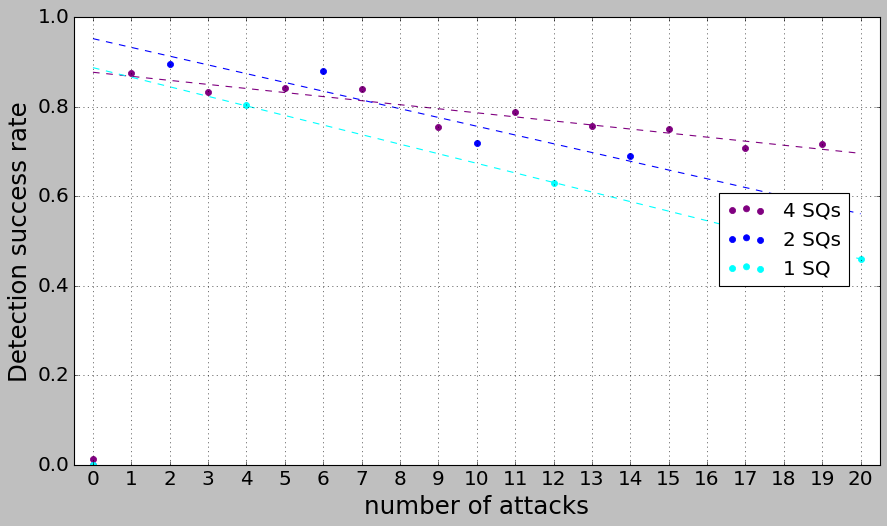

In [45]:
from matplotlib import cm
import scipy.optimize as opt

def linfit(x, m, c):
    return m*x + c

#plt.style.use('classic')
cmap = cm.get_cmap('viridis')
fig, ax = plt.subplots(figsize = (13,7))

fitted_params_4sq, pcov_4sq = opt.curve_fit(linfit, cnot_counts_4sq[1:], prob1_4sq[1:])
fitted_params_2sq, pcov_2sq = opt.curve_fit(linfit, cnot_counts_2sq[1:], prob1_2sq[1:])
fitted_params_1sq, pcov_1sq = opt.curve_fit(linfit, cnot_counts_1sq[1:], prob1_1sq[1:])
#ax.plot(list(range(1,grover_iterations+1)), fidelities_oracles[0], label='Grover 000', marker='^', linewidth=0.7, markersize=7, alpha=0.5, color='blue')

ax.scatter(cnot_counts_4sq, prob1_4sq, label=r'4 SQs', marker='o', linewidth=0.7, s=30, color='purple')
ax.scatter(cnot_counts_2sq, prob1_2sq, label=r'2 SQs', marker='o', linewidth=0.7, s=30, color='blue')
ax.scatter(cnot_counts_1sq, prob1_1sq, label=r'1 SQ', marker='o', linewidth=0.7, s=30, color='aqua')

fit_counts = np.linspace(0,20,1000)
ax.plot(fit_counts, linfit(fit_counts, *fitted_params_4sq), color = 'purple', ls='dashed')
ax.plot(fit_counts, linfit(fit_counts, *fitted_params_2sq), color = 'blue', ls='dashed')
ax.plot(fit_counts, linfit(fit_counts, *fitted_params_1sq), color = 'aqua', ls='dashed')
#ax.scatter(cnot_counts_4sq[:5], prob0_4sq[:5], label=r'2m+1 CNOTs Xtalk $\left|0\right>$ detection rate (4 SQ)', marker='o', linewidth=0.7, s=30, color='red')
#ax.scatter(cnot_counts_2sq[:3], prob0_2sq[:3], label=r'4m+2 CNOTs Xtalk $\left|0\right>$ detection rate (2 SQ)', marker='o', linewidth=0.7, s=30, color='darkred')
#ax.scatter(cnot_counts_1sq[:2], prob0_1sq[:2], label=r'8m+4 CNOTs Xtalk $\left|0\right>$ detection rate (1 SQ)', marker='o', linewidth=0.7, s=30, color='orange')

ax.legend(loc=(0.8,0.4),fontsize=18)
#ax.grid()
ax.set_xticks(list(range(0,21)))
ax.grid()
ax.set_xlim(-0.5,20.5)
ax.set_ylim([0,1])
#ax.set_title('Grover101 on qubit 21,23,24 subject to internal crosstalk noise', fontsize=15)
ax.tick_params(labelsize=18)
ax.set_xlabel("number of attacks", fontsize=22)
ax.set_ylabel("Detection success rate", fontsize=22)

#fig.savefig('C:/Users/k0426/Documents/PhD_Project/paper 1/detection rate single-H amplified.pdf',dpi=300, bbox_inches="tight")
### N.B. from the sampled HSA model data, the crosstalk errors generated by CNOT attacks acting on qubit a,b in either the forward or reversed direction are almost the same. 
### Therefore, the order of control and target by a CNOT gate has little effect on the final detection rate. We decide to use the axis averaged over the two orientations as
### mean rotation axis caused by crosstalk on some qubit i, and apply the CNOT attacks in an alternating sequence of control and targets to mix the behaviour two possible CNOT orientations. 

In [3]:
#Crosstalk rate amplified for all paramters (2.51, 2.47, 2.276 for 4,2,1 SQs respectively)
CNOT_counts = [0,1,2,3,4,5,6,7]

TVD_new_filtered_to_ideal = [0, 0.04655887999999997, 0.08878244, 0.19758233999999997, 0.11153938, 0.15488409999999997, 0.18856316, 0.20700642999999996] #0,1,2,3,4,5,6,7
TVD_new_filtered_to_ideal_std = [0, 0.01947248, 0.00996493, 0.02671148, 0.01135766, 0.01302322, 0.02961248, 0.02453832]

TVD_new_unfiltered_to_ideal = [0, 0.20750000000000002, 0.4575, 0.345, 0.3375, 0.2825, 0.39, 0.36750000000000005] #0,1,2,3,4,5,6,7
TVD_new_unfiltered_to_ideal_std = [0, 0.0143069, 0.01948557, 0.02861381, 0.00544862, 0.00892679, 0.02474874, 0.01340476]

TVD_old_filtered_to_ideal = [0, 0.10305103, 0.23573589, 0.25361273, 0.13289835, 0.06861991, 0.05391414, 0.06122995]#0,1,2,3,5,6,7
TVD_old_filtered_to_ideal_std = [0, 0.01660787, 0.01370477, 0.0156206, 0.01869101, 0.02237182, 0.01967541, 0.01901735]

TVD_old_unfiltered_to_ideal = [0, 0.13, 0.3475, 0.4275, 0.295, 0.28, 0.35, 0.415]#0,1,2,3,5,6,7
TVD_old_unfiltered_to_ideal_std = [0, 0.01541104, 0.00892679, 0.02301494, 0.0225, 0.01118034, 0.01457738, 0.01436141]


#250 shots /4trials
TVD_new_filtered_to_ideal = [0, 0.08283334, 0.08800599, 0.17293563, 0.11649204, 0.18987604, 0.17243246, 0.24181309]
TVD_new_filtered_to_ideal_std = [0, 0.00972867, 0.01366525, 0.00847877, 0.0070475, 0.01105101, 0.01263001, 0.00766655]

TVD_new_unfiltered_to_ideal = [0, 0.235, 0.407, 0.348, 0.281, 0.287, 0.384, 0.364]
TVD_new_unfiltered_to_ideal_std = [0, 0.00517204, 0.00804674, 0.00469042, 0.01052378, 0.00668954, 0.00469042, 0.00707107]

TVD_old_filtered_to_ideal = [0, 0.11393425, 0.23206374, 0.20644916, 0.13666788, 0.05613341, 0.03709522, 0.04344948]
TVD_old_filtered_to_ideal_std = [0, 0.00839525, 0.01505636, 0.01235511, 0.02255678, 0.00999453, 0.00443403, 4.02828904e-03]

TVD_old_unfiltered_to_ideal = [0, 0.145, 0.351, 0.396, 0.314, 0.269, 0.373, 0.441]
TVD_old_unfiltered_to_ideal_std = [0, 0.00864581, 0.00792149, 0.00927362, 0.00538516, 0.00887412, 0.00165831, 0.00554527]


### error parameters amplification factor for odd(1,3,5..) even(2,6..) even(4...) are different (2.51, 2.47, 2.276) respectively
### this is to make sure the total rotation picked up by GHZ state is as close to pi as possible
### the small change in the factor do not impact the optimal resetting frequency (4 layers per reset) when applying old strategy 

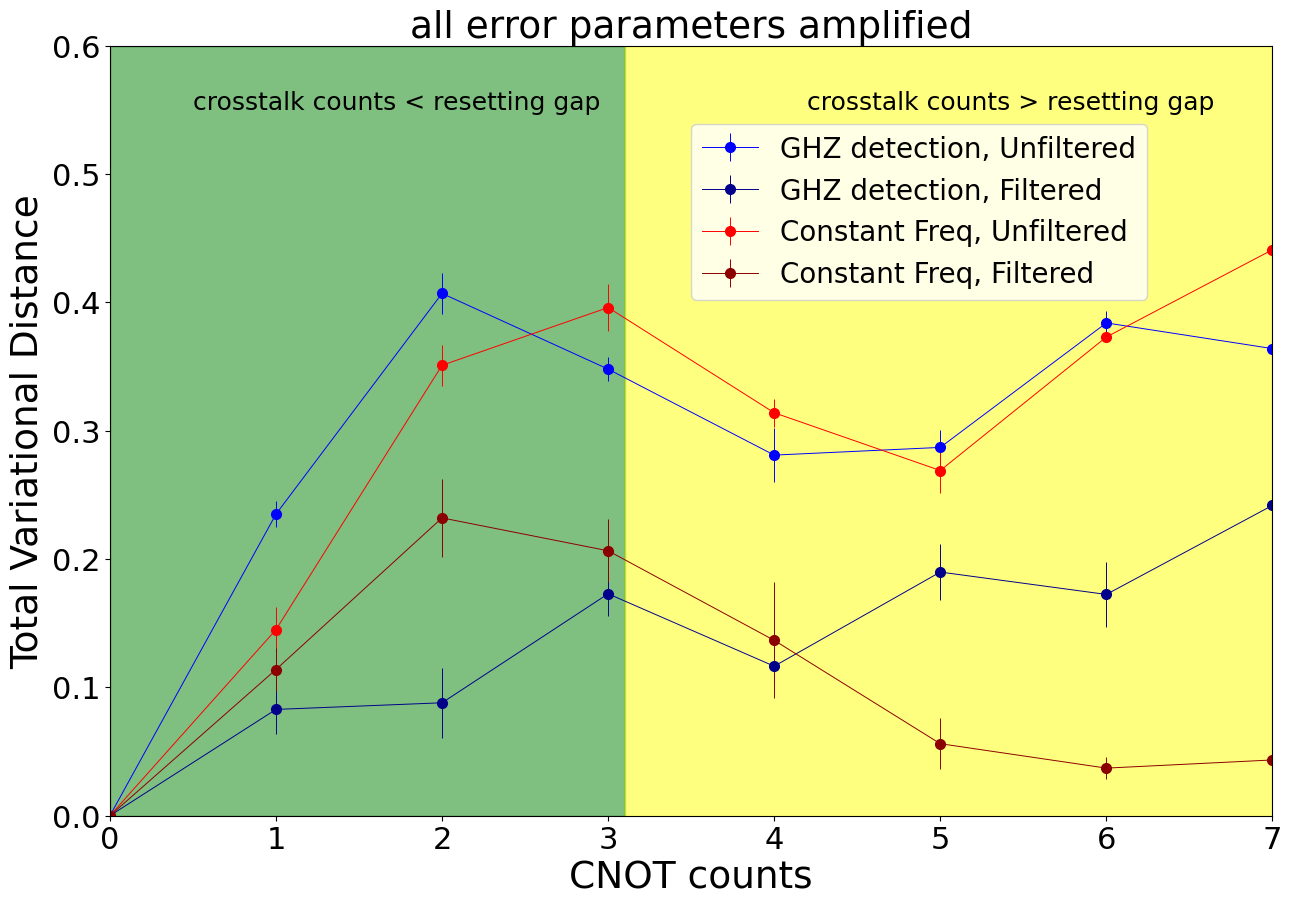

In [12]:
#plt.style.use('classic')
fig, ax = plt.subplots(figsize = (15,10))

ax.errorbar(CNOT_counts, TVD_new_unfiltered_to_ideal, yerr=2*np.array(TVD_new_unfiltered_to_ideal_std), label='GHZ detection, Unfiltered', marker='o', linewidth=0.7, markersize=7, color='blue')
ax.errorbar(CNOT_counts, TVD_new_filtered_to_ideal, yerr=2*np.array(TVD_new_filtered_to_ideal_std), label='GHZ detection, Filtered', marker='o', linewidth=0.7, markersize=7, color='darkblue')

ax.errorbar(CNOT_counts, TVD_old_unfiltered_to_ideal, yerr=2*np.array(TVD_old_unfiltered_to_ideal_std), label='Constant Freq, Unfiltered', marker='o', linewidth=0.7, markersize=7, color='red')
ax.errorbar(CNOT_counts, TVD_old_filtered_to_ideal, yerr=2*np.array(TVD_old_filtered_to_ideal_std), label='Constant Freq, Filtered', marker='o', linewidth=0.7, markersize=7, color='darkred')

#ax.axvline(x=4.2, color='black')
ax.axvspan(0, 3.1, alpha=0.5, color='green')
ax.axvspan(3.1, 7, alpha=0.5, color='yellow')
ax.annotate('crosstalk counts < resetting gap', (0.5,0.55), size=18)
ax.annotate('crosstalk counts > resetting gap', (4.2,0.55), size=18)
ax.legend(loc=(0.5, 0.67), fontsize=20)
#ax.grid()
#ax.set_xticks(list(range(1,grover_iterations+1)))
ax.set_xlim(0,7)
ax.set_ylim([0,0.6])
ax.set_title(r'all error parameters amplified', fontsize=27) #origin=0,1, $DQ\in\{4,7\}, SQ\in\{2,3,5,8\}$
ax.tick_params(labelsize=22)
ax.set_xlabel("CNOT counts",fontsize=27)
ax.set_ylabel("Total Variational Distance",fontsize=27)

fig.savefig('figures/all error parameters amplified Bell state IDT.pdf', dpi=300, bbox_inches="tight")

In [13]:
#Crosstalk rate amplified for H-single parameter only (2.51, for 4,2,1 SQs respectively)
CNOT_counts = [0,1,2,3,4,5,6,7]
#100 shots /4trials
TVD_new_filtered_to_ideal = [0, 0.0329798, 0.01461161, 0.11550568, 0.02848687, 0.05694733, 0.0462473, 0.11660265]
TVD_new_filtered_to_ideal_std = [0, 0.00732319, 0.00421871, 0.02346373, 0.00462634, 0.00949889, 0.01003144, 0.01663659]

TVD_new_unfiltered_to_ideal = [0, 0.2225, 0.435, 0.42, 0.295, 0.14, 0.2625, 0.49] 
TVD_new_unfiltered_to_ideal_std = [0, 0.01849831, 0.01030776, 0.005, 0.00559017, 0.00612372, 0.01672386, 0.00353553]

TVD_old_filtered_to_ideal = [0, 0.13348524, 0.2864557, 0.20474143, 0.12494171, 0.01442308, 0.00490196, 0.00490196]
TVD_old_filtered_to_ideal_std = [0, 0.01778711, 0.01115192, 0.01719828, 0.01223219, 0.00416358, 0.00424522, 0.00424522]

TVD_old_unfiltered_to_ideal = [0, 0.165, 0.435, 0.44, 0.36, 0.165, 0.34, 0.48]
TVD_old_unfiltered_to_ideal_std = [0, 0.01436141, 0.01030776, 0.00935414, 0.0106066, 0.0075, 0.00866025, 0.00353553]


#250 shots /4trials
TVD_new_filtered_to_ideal = [0, 0.04301978, 0.02882003, 0.10883186, 0.03234508, 0.07421768, 0.04475077, 0.1331959]
TVD_new_filtered_to_ideal_std = [0, 0.01176729, 0.0062032, 0.00403457, 0.00713693, 0.0077611, 0.00252326, 0.00787129]

TVD_new_unfiltered_to_ideal = [0, 0.188, 0.429, 0.439, 0.301, 0.123, 0.293, 0.489]
TVD_new_unfiltered_to_ideal_std = [0, 0.0116619, 0.00384057, 0.01098863, 0.0128355, 0.01243986, 0.00852936, 0.00217945]

TVD_old_filtered_to_ideal = [0, 0.1502795, 0.28715644, 0.21971272, 0.13662291, 0.00945589, 0.01550434, 0.0174894]
TVD_old_filtered_to_ideal_std = [0, 0.00851775, 0.00937501, 0.00790819, 0.00796674, 0.00490039, 0.00548161, 0.00685463]

TVD_old_unfiltered_to_ideal = [0, 0.166, 0.398, 0.438, 0.318, 0.157, 0.334, 0.486]
TVD_old_unfiltered_to_ideal_std = [0, 0.00714143, 0.00866025, 0.00754983, 0.009, 0.01186381, 0.00728011, 0.00360555]


### error parameters amplification factor for odd(1,3,5..) even(2,6..) even(4...) are different (2.51, ) respectively
### this is to make sure the total rotation picked up by GHZ state is as close to pi as possible
### the small change in the factor do not impact the optimal resetting frequency (4 layers per reset) when applying old strategy 


### In the yellow shaded region, it is impossile to fulfill all layers within one resetting period, hence we expect the GHZ amplifier strategy should
### perform the best in constrast to the traditional strategy of crosstalk detection.

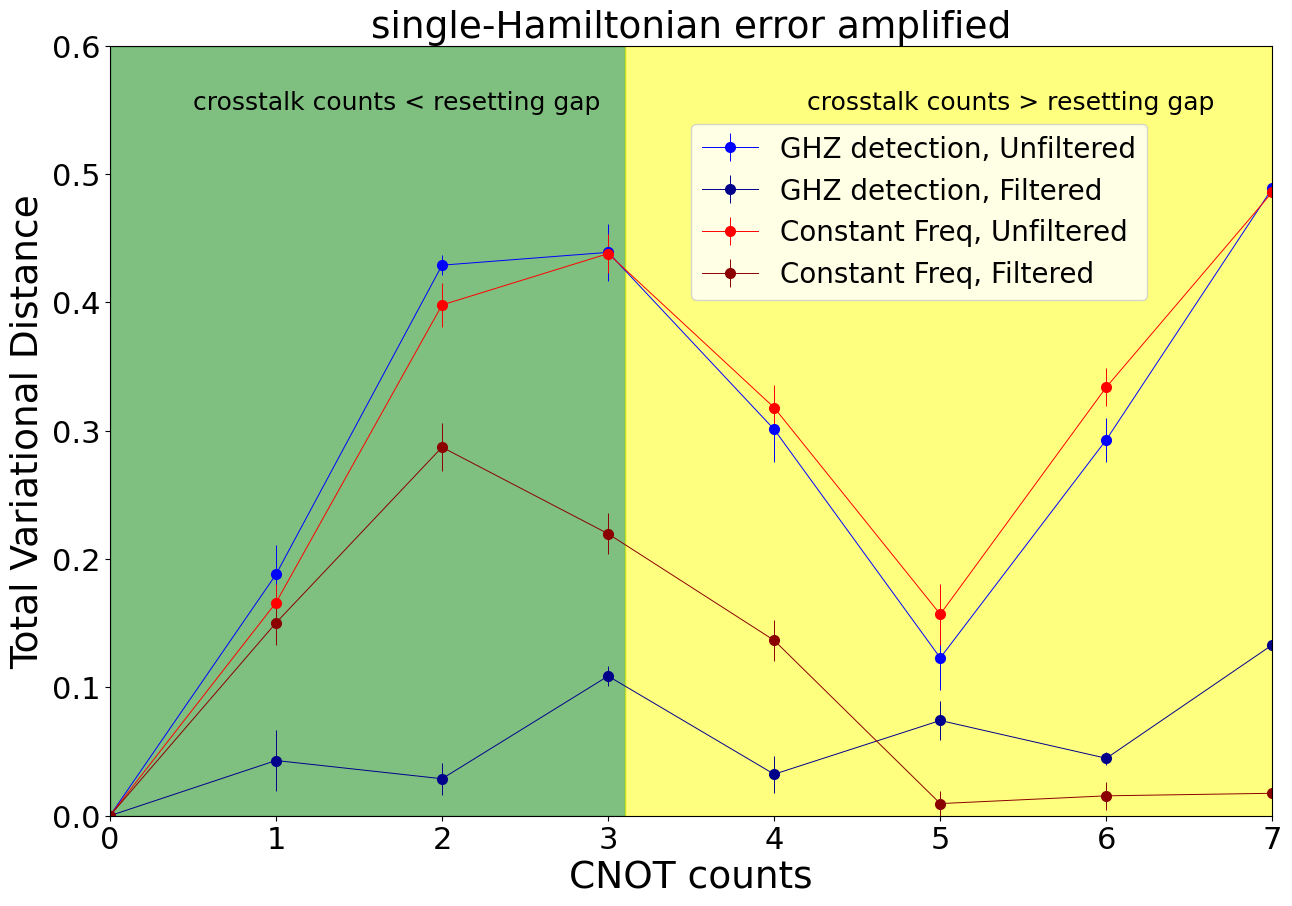

In [15]:
#plt.style.use('classic')
fig, ax = plt.subplots(figsize = (15,10))

ax.errorbar(CNOT_counts, TVD_new_unfiltered_to_ideal, yerr=2*np.array(TVD_new_unfiltered_to_ideal_std), label='GHZ detection, Unfiltered', marker='o', linewidth=0.7, markersize=7, color='blue')
ax.errorbar(CNOT_counts, TVD_new_filtered_to_ideal, yerr=2*np.array(TVD_new_filtered_to_ideal_std), label='GHZ detection, Filtered', marker='o', linewidth=0.7, markersize=7, color='darkblue')

ax.errorbar(CNOT_counts, TVD_old_unfiltered_to_ideal, yerr=2*np.array(TVD_old_unfiltered_to_ideal_std), label='Constant Freq, Unfiltered', marker='o', linewidth=0.7, markersize=7, color='red')
ax.errorbar(CNOT_counts, TVD_old_filtered_to_ideal, yerr=2*np.array(TVD_old_filtered_to_ideal_std), label='Constant Freq, Filtered', marker='o', linewidth=0.7, markersize=7, color='darkred')

#ax.axvline(x=4.2, color='black')
ax.axvspan(0, 3.1, alpha=0.5, color='green')
ax.axvspan(3.1, 7, alpha=0.5, color='yellow')
ax.annotate('crosstalk counts < resetting gap', (0.5,0.55), size=18)
ax.annotate('crosstalk counts > resetting gap', (4.2,0.55), size=18)
ax.legend(loc=(0.5, 0.67), fontsize=20)
#ax.grid()
#ax.set_xticks(list(range(1,grover_iterations+1)))
ax.set_xlim(0,7)
ax.set_ylim([0,0.6])
ax.tick_params(labelsize=22)
ax.set_title(r'single-Hamiltonian error amplified', fontsize=27) # others unchanged, origin=0,1, $DQ\in\{4,7\}, SQ\in\{2,3,5,8\}$
ax.set_xlabel("CNOT counts",fontsize=27)
ax.set_ylabel("Total Variational Distance",fontsize=27)

fig.savefig('figures/single H amplified Bell state IDT.pdf', dpi=300, bbox_inches="tight")